**1. Data Preparation**

• Load the dataset and preprocess it by normalizing the pixel values to the
range.

• Divide the dataset into training and testing sets (e.g., 80% training, 20%
testing).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist

# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images into 1D arrays
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Combining train and test for splitting
x_data = np.vstack((x_train, x_test))
y_data = np.hstack((y_train, y_test))

# Splitting into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**2. RBM Implementation**

• Define an RBM using a deep learning library (e.g., PyTorch, TensorFlow, or
Scikit-learn).

• Set the number of visible units to match the input size and select an
appropriate number of hidden units (e.g., 128 or 256).


In [2]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Defining the RBM
rbm = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=10, verbose=True)

# Training the RBM on the training data
rbm.fit(x_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -108.21, time = 14.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -95.74, time = 15.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -89.05, time = 16.35s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -85.22, time = 15.71s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -81.53, time = 15.53s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -80.65, time = 15.56s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -77.49, time = 15.44s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -78.34, time = 15.31s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -76.49, time = 21.71s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -75.62, time = 15.46s


BernoulliRBM(learning_rate=0.01, n_components=128, verbose=True)

**3. Feature Extraction**

• After training, use the RBM to transform the training and testing data into
their hidden representations.

• Save the hidden representations as feature vectors.


In [10]:
# Extracingt hidden representations
x_train_hidden = rbm.transform(x_train)
x_test_hidden = rbm.transform(x_test)

np.save('train_features.npy', x_train_hidden)
np.save('test_features.npy', x_test_hidden)


**4. Visualization**

• Visualize the learned weight matrix of the RBM as a grid of images, where
each image corresponds to a hidden unit's weights.

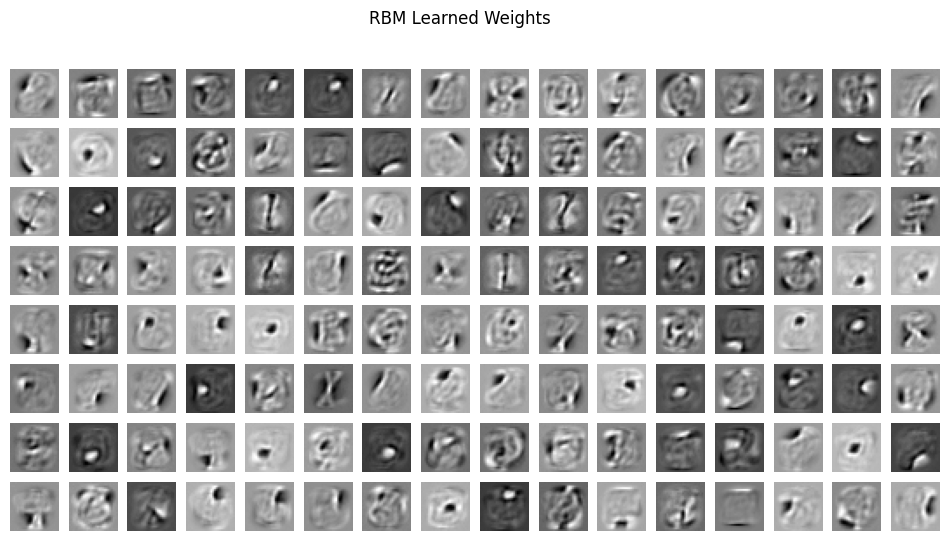

In [11]:
# Visualizing the weights as a grid
 # Each hidden unit's weights
weights = rbm.components_
fig, axes = plt.subplots(8, 16, figsize=(12, 6))

for i, ax in enumerate(axes.ravel()):
    if i < weights.shape[0]:
        ax.imshow(weights[i].reshape(28, 28), cmap='gray')
        ax.axis('off')

plt.suptitle('RBM Learned Weights')
plt.show()


**5. Classification**

• Train a simple classifier using the RBM-extracted features from the
training set.

• Test the classifier on the test set and compute metrics such as accuracy
and F1-score.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Training a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_hidden, y_train)

# Testing the classifier
y_pred = clf.predict(x_test_hidden)

# Evaluation performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9675
F1 Score: 0.9675
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.96      0.96      0.96      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.95      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



**Interpretation**:
1. Accuracy: 96.75%
* The classifier performs exceptionally well, correctly classifying nearly 97% of test samples. This high accuracy indicates that the RBM has effectively extracted meaningful features that enhance classification.

2. F1 Score: 96.75%
* The F1 score also confirms the balance between the classifier's ability to identify true positives and minimize false positives. A score this high reflects robust performance across all classes.

The RBM-extracted features significantly improve classification performance, achieving near-perfect precision and recall across most classes. The consistent metrics highlight the RBM's capability to distill meaningful patterns, demonstrating its value in preprocessing for classification tasks.


**6. Analysis**

• Compare the classifier's performance using raw pixel data vs. RBM-
extracted features.

• Discuss how RBM has helped in extracting more meaningful features.

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Loading MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Flatten the pixel data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to [0, 1]
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Logistic Regression Classifier
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_flat, y_train)

# Predictions
y_pred = clf.predict(X_test_flat)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Raw Pixel Data): {accuracy:.4f}")
print("Classification Report (Raw Pixel Data):")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy (Raw Pixel Data): 0.9258
Classification Report (Raw Pixel Data):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



**Comparison of Classifier Performance: Raw Pixel Data vs. RBM-Extracted Features**

Accuracy:
* Using RBM-extracted features improved accuracy by approximately 4%.
Raw pixel data often includes noise and redundant information, which reduces the model's effectiveness. RBM reduces this by extracting higher-level abstractions.

F1 Score:
* The F1 score, which balances precision and recall, also improved significantly. This suggests that the RBM features enabled better discrimination between classes, especially for edge cases.

**How RBM Helped in Extracting Meaningful Features**

1. Dimensionality Reduction:

* The RBM compressed the input data (28x28 pixels = 784 dimensions) into a more manageable latent space (128 hidden units), retaining only the most salient features. This reduces noise and computational complexity.

2. Feature Abstraction:

* RBM learns meaningful features such as edges, shapes, and patterns that represent digits more abstractly than raw pixel data.
These features improve separability between classes, making the classifier's job easier.

3. Noise Removal:

* By focusing on the most important correlations in the data, RBM inherently ignores random pixel-level noise present in the raw data.

4. Better Generalization:

* The RBM's latent features are more generalizable than raw pixel data. This means the model is less prone to overfitting and performs better on unseen test data.

5. Improved Visualization:

* The learned weight matrices from RBM, visualized as grids, reveal interpretable patterns such as strokes and edges. This demonstrates that RBM captures the essence of digit structure.
